# Reproduce codeml analysis from Yang Z (MBE, 1998) 


This recipe shows how to reproduce the analysis carried out in [Yang Z (MBE, 1998)](http://www.ncbi.nlm.nih.gov/pubmed/9580986) using `ete-evol`. The data files are extracted from the examples in the PAML package, small dataset will be used:

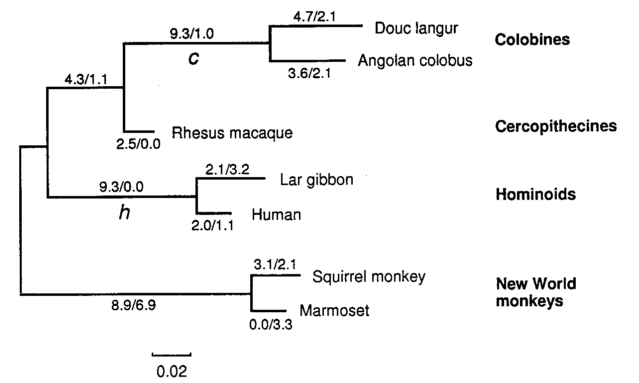

In [2]:
from IPython.display import Image
Image(filename='data/lysozyme/Lysozyme_small_tree.png')

The files that we are going to use for this example are:
* data/lysozyme/lysozymeSmall.txt
* data/lysozyme/lysozymeSmall.trees
* data/lysozyme/lysozymeSmall.ctl

## Requirements

- ete3
- ete3_external_tools

# 1. Run PAML example as is

ete_evol tools allows to run directly CodeML using PAML configuration file.



In [1]:
%%bash
cat data/lysozyme/lysozymeSmall.ctl

      seqfile = lysozymeSmall.txt
     treefile = lysozymeSmall.trees
      outfile = mlc

        noisy = 9   * 0,1,2,3,9: how much rubbish on the screen
      verbose = 1   * 1: detailed output, 0: concise output
      runmode = 0   * 0: user tree;  1: semi-automatic;  2: automatic
                    * 3: StepwiseAddition; (4,5):PerturbationNNI 

      seqtype = 1   * 1:codons; 2:AAs; 3:codons-->AAs
    CodonFreq = 2   * 0:1/61 each, 1:F1X4, 2:F3X4, 3:codon table
        clock = 0   * 0: no clock, unrooted tree, 1: clock, rooted tree
        model = 2
                    * models for codons:
                        * 0:one, 1:b, 2:2 or more dN/dS ratios for branches

      NSsites = 0   * dN/dS among sites. 0:no variation, 1:neutral, 2:positive
        icode = 0   * 0:standard genetic code; 1:mammalian mt; 2-10:see below

    fix_kappa = 0   * 1: kappa fixed, 0: kappa to be estimated
        kappa = 2   * initial or fixed kappa
    fix_omega = 0   * 1: omega or omega_1 fixed, 0: est

The configuration file above corresponds to a branch model where marked branches are allowed to evolve at different $\omega$ rate than non-marked branches. In this example from PAML, the branch marked is the branch *c* (the ancestor of Angolan colobus and Douc langur). See the tree in the PAML example:

In [2]:
%%bash
head data/lysozyme/lysozymeSmall.trees

    1


((Hsa_Human, Hla_gibbon),((Cgu/Can_colobus, Pne_langur) '#1', Mmu_rhesus), (Ssc_squirrelM, Cja_marmoset)); / * table 1B&F */


// end of file





Running codeml from the ete_evol tool using this configuration file would be:

In [3]:
%%bash
ete3 evol --codeml_config_file data/lysozyme/lysozymeSmall.ctl

Using: /Users/fransua/.miniconda2/bin/ete3_apps/bin/Slr
Using: /Users/fransua/.miniconda2/bin/ete3_apps/bin/codeml

Running CodeML/Slr (1 CPUs)
  - processing model XX.lysozymeSmall.ctl
       marking branches 11

          ((Hsa_Human,Hla_gibbon),((Cgu/Can_colobus,Pne_langur) #1,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

SUMMARY BY MODEL

 - Model XX.lysozymeSmall.ctl.11-1
   * Marked branches
      ((Hsa_Human,Hla_gibbon),((Cgu/Can_colobus,Pne_langur) #1,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

        Branches  =>   omega
              #1  =>   3.506
      background  =>   0.686


This command will run codeml on the control file with the only difference that the output file will be replaced by an output folder where all PAML ouput files will be stored.

In [4]:
%%bash
ls data/lysozyme/mlc/XX.lysozymeSmall.ctl/

2NG.dN
2NG.dS
2NG.t
4fold.nuc
algn
lnf
out
rst
rst1
rub
tmp.ctl
tree


Notice that an extra folder called `XX.lysozymeSmall.ctl` is created in order to allow one extra layer of organization if several control files have the same "outfile".

At the end of the main codeML output file we can see the result of the optimized branch model with a foreground $\omega$ of 3.5 and a background $\omega$ of 0.7

In [5]:
%%bash
tail -n 5 data/lysozyme/mlc/XX.lysozymeSmall.ctl/out

w ratios as labels for TreeView:
((Hsa_Human #0.6858 , Hla_gibbon #0.6858 ) #0.6858 , ((Cgu/Can_colobus #0.6858 , Pne_langur #0.6858 ) #3.5057 , Mmu_rhesus #0.6858 ) #0.6858 , (Ssc_squirrelM #0.6858 , Cja_marmoset #0.6858 ) #0.6858 );


Time used:  0:04


On top of this, the ete_evol tool will generate a summary image:

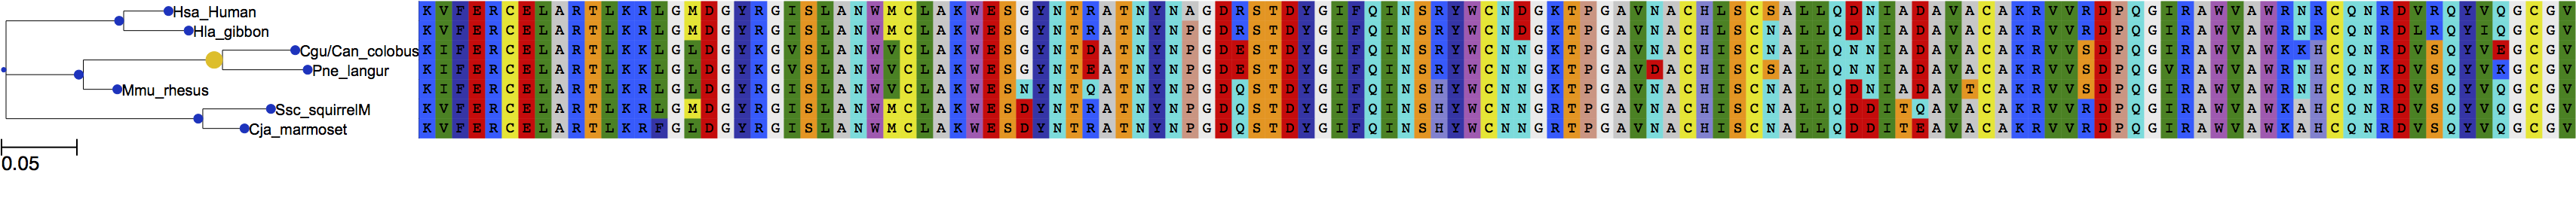

In [6]:
from IPython.display import Image
Image(filename='data/lysozyme/tree_evol_example1.png')

Image which can be called interactively using the `--view` flag:

In [7]:
%%bash
ete3 evol --codeml_config_file data/lysozyme/lysozymeSmall.ctl --view --resume

Using: /Users/fransua/.miniconda2/bin/ete3_apps/bin/Slr
Using: /Users/fransua/.miniconda2/bin/ete3_apps/bin/codeml

Running CodeML/Slr (1 CPUs)
  - processing model XX.lysozymeSmall.ctl
       marking branches 11

Model XX.lysozymeSmall.ctl.11-1 already executed... SKIPPING
SUMMARY BY MODEL

 - Model XX.lysozymeSmall.ctl.11-1
   * Marked branches
      ((Hsa_Human,Hla_gibbon),((Cgu/Can_colobus,Pne_langur) #1,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

        Branches  =>   omega
              #1  =>   3.506
      background  =>   0.686


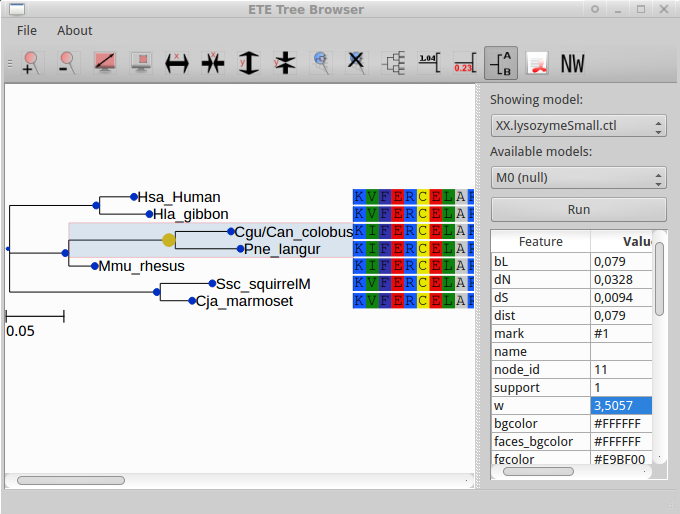

In [8]:
from IPython.display import Image
Image(filename='data/lysozyme/ete_run1_lysozyme.png')

## 2. Branch models

We are now going to try to reproduce the results of the papper corresponding to this example [Yang Z (MBE, 1998)](http://www.ncbi.nlm.nih.gov/pubmed/9580986).

Infact we are going to reproduce the results presented in the Table 1 of the paper (for the small dataset, red rectangle):

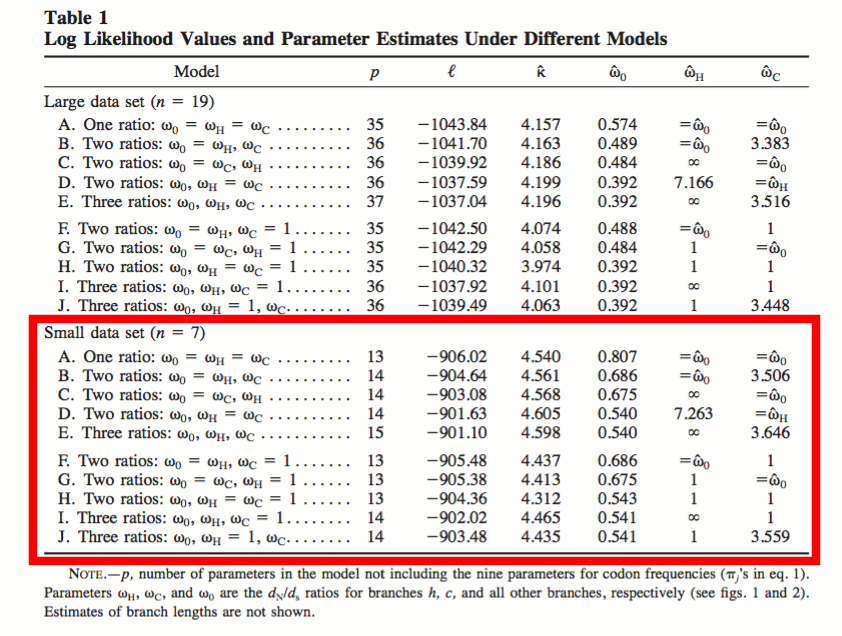

In [9]:
from IPython.display import Image
Image(filename='data/lysozyme/table1_paper.png')

The first model to run would be the model M0 where all branches are constrained to evolve under a unique $\omega$ value ($\omega_0=\omega_h=\omega_c$)

In [11]:
%%bash
ete3 evol -t data/lysozyme/lysozymeSmall.trees --alg data/lysozyme/lysozymeSmall.txt --model M0

Using: /Users/fransua/.miniconda2/bin/ete3_apps/bin/Slr
Using: /Users/fransua/.miniconda2/bin/ete3_apps/bin/codeml

Running CodeML/Slr (1 CPUs)
  - processing model M0
SUMMARY BY MODEL

 - Model M0
   * Average omega for all tree: 0.807


The estimated value of $\omega$ of 0.807 here displayed in the summary report indeed corresponds to the value in the table (raw A of the section of interest)

Next we would run a branch model that allows the *c* branch (ancestor of Douc langur and Angolan colobus) to evolve independently (we use the flag `--mark` giving the names of the two species separated by a double comma, meaning that we want to mark the ancestor only).

In [13]:
%%bash
ete3 evol -t data/lysozyme/lysozymeSmall.trees --alg data/lysozyme/lysozymeSmall.txt --model b_free --clear_all \
--mark Pne_langur,,Cgu/Can_colobus --clear_tree

Using: /Users/fransua/.miniconda2/bin/ete3_apps/bin/Slr
Using: /Users/fransua/.miniconda2/bin/ete3_apps/bin/codeml

Running CodeML/Slr (1 CPUs)
  - processing model b_free
       marking branches 11

          ((Hsa_Human,Hla_gibbon),((Cgu/Can_colobus,Pne_langur) #1,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

SUMMARY BY MODEL

 - Model b_free.11-1
   * Marked branches
      ((Hsa_Human,Hla_gibbon),((Cgu/Can_colobus,Pne_langur) #1,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

        Branches  =>   omega
              #1  =>   3.506
      background  =>   0.686


This time, two values of omega are estimated, one for the marked branch (#1 $\omega_c$ in the table), and one corresponding to the rest of the tree, commonly refferd to as "background" omega, or $\omega_0$. Again, the values estimated here are equivalent to the ones in the table.

*Note: the use of the flag `--clear_tree` that will remove all marks present in the input tree before starting the analysis.*

We now repeat the analysis marking the *h* branch:

In [14]:
%%bash
ete3 evol -t data/lysozyme/lysozymeSmall.trees --alg data/lysozyme/lysozymeSmall.txt --model b_free --clear_all \
--mark Hsa_Human,,Hla_gibbon --clear_tree

Using: /Users/fransua/.miniconda2/bin/ete3_apps/bin/Slr
Using: /Users/fransua/.miniconda2/bin/ete3_apps/bin/codeml

Running CodeML/Slr (1 CPUs)
  - processing model b_free
       marking branches 9

          ((Hsa_Human,Hla_gibbon) #1,((Cgu/Can_colobus,Pne_langur),Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

SUMMARY BY MODEL

 - Model b_free.9-1
   * Marked branches
      ((Hsa_Human,Hla_gibbon) #1,((Cgu/Can_colobus,Pne_langur),Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

        Branches  =>   omega
      background  =>   0.675
              #1  => 999.000


We find again the same result as in Table1 ($\omega$ of 999 are equivalent to infinite).

For the D. model of Table1 we need to mark two branches wih the same mark, which can be done with the command line with `--mark Hsa_Human,,Hla_gibbon=Pne_langur,,Cgu/Can_colobus` or perhaps, for this more complicated case, easily using the --interactive flag:

In [16]:
%%bash
ete3 evol -t data/lysozyme/lysozymeSmall.trees --alg data/lysozyme/lysozymeSmall.txt --model b_free \
--clear_tree --clear_all --interactive

Using: /Users/fransua/.miniconda2/bin/ete3_apps/bin/Slr
Using: /Users/fransua/.miniconda2/bin/ete3_apps/bin/codeml
[]
[]

Running CodeML/Slr (1 CPUs)
  - processing model b_free



Error: need branch labels in the tree for the model..
Traceback (most recent call last):
  File "/Users/fransua/.miniconda2/bin/ete3", line 9, in <module>
    load_entry_point('ete3', 'console_scripts', 'ete3')()
  File "/Users/fransua/Box/ete/ete3/tools/ete.py", line 92, in main
    _main(sys.argv)
  File "/Users/fransua/Box/ete/ete3/tools/ete.py", line 238, in _main
    args.func(args)
  File "/Users/fransua/Box/ete/ete3/tools/ete_evol.py", line 862, in run
    load_model(model, tree, models[model], **params)
  File "/Users/fransua/Box/ete/ete3/tools/ete_evol.py", line 664, in load_model
    model_obj.name, path)))
Exception: ERROR: model b_free failed, problem with outfile:
/tmp/ete3-tmp/b_free/out
bash: line 2: 18566 Segmentation fault: 11  ete3 evol -t data/lysozyme/lysozymeSmall.trees --alg data/lysozyme/lysozymeSmall.txt --model b_free --clear_tree --clear_all --interactive


In [47]:
%%bash
ete3 evol -t data/lysozyme/lysozymeSmall.trees --alg data/lysozyme/lysozymeSmall.txt --model b_free --clear_all --cpu 3 \
--interactive \
--mark Hsa_Human,,Hla_gibbon,Pne_langur,,Cgu/Can_colobus Pne_langur,,Cgu/Can_colobus Hsa_Human,,Hla_gibbon=Pne_langur,,Cgu/Can_colobus

Using: /Users/fransua/.miniconda2/bin/ete3_apps/bin/Slr
Using: /Users/fransua/.miniconda2/bin/ete3_apps/bin/codeml

Running CodeML/Slr (3 CPUs)
  - processing model b_free
       marking branches 11

          ((Hsa_Human,Hla_gibbon),((Cgu/Can_colobus,Pne_langur) #1,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

       marking branches 9, 11

          ((Hsa_Human,Hla_gibbon) #1,((Cgu/Can_colobus,Pne_langur) #2,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

       marking branches 9, 11

          ((Hsa_Human,Hla_gibbon) #1,((Cgu/Can_colobus,Pne_langur) #1,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

       marking branches 3

          ((Hsa_Human,Hla_gibbon  #1),((Cgu/Can_colobus,Pne_langur),Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

SUMMARY BY MODEL

 - Model b_free.9_11-1_1
   * Marked branches
      ((Hsa_Human,Hla_gibbon) #1,((Cgu/Can_colobus,Pne_langur) #1,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

        Branches  =>   omega
      background  =>   0.540
              #1  =>   7.263

/Users/fransua/Box/ete/ete3/tools/ete_evol.py:432: UserWarning: WARNING: removing duplicated mark (Cgu/Can_colobus,Pne_langur);#1
  for n in range(len(nodes[bad]))])))
